In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://gitlab.com/emirhanozyurt55/signal-processing/-/raw/master/thinkdsp.py

In [2]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):
    
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

In [3]:
sawtooth = SawtoothSignal().make_wave(duration=1.0, framerate=45000)
sawtooth.make_audio()

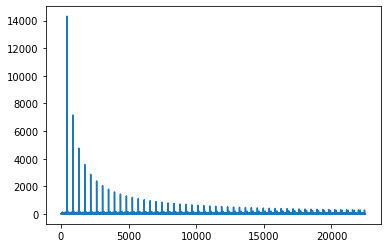

In [4]:
sawtooth.make_spectrum().plot()

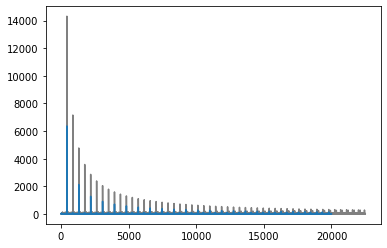

In [5]:
from thinkdsp import SquareSignal

sawtooth.make_spectrum().plot(color='gray')
square = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot()

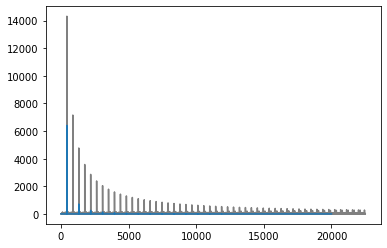

In [6]:
from thinkdsp import TriangleSignal

sawtooth.make_spectrum().plot(color='gray')
triangle = TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=40000)
triangle.make_spectrum().plot()

In [7]:
square = SquareSignal(1100).make_wave(duration=0.5, framerate=10000)

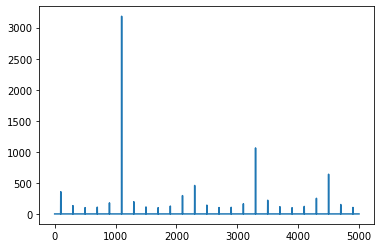

In [8]:
square.make_spectrum().plot()

In [9]:
square.make_audio()

In [10]:
from thinkdsp import SinSignal

SinSignal(500).make_wave(duration=0.5, framerate=10000).make_audio()

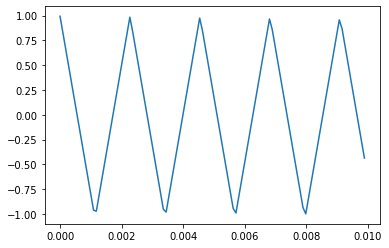

In [11]:
triangle = TriangleSignal().make_wave(duration=0.01)
triangle.plot()

In [12]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

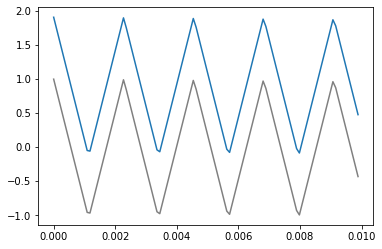

In [13]:
spectrum.hs[0] = 100
triangle.plot(color='gray')
spectrum.make_wave().plot()

In [14]:
def filter_spectrum(spectrum):

    # avoid division by 0
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

In [15]:
wave = TriangleSignal(freq=440).make_wave(duration=0.5)
wave.make_audio()

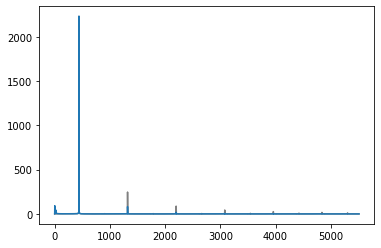

In [16]:
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='gray')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=10000)

In [17]:
filtered = spectrum.make_wave()
filtered.make_audio()

In [18]:
freq = 500
signal = SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

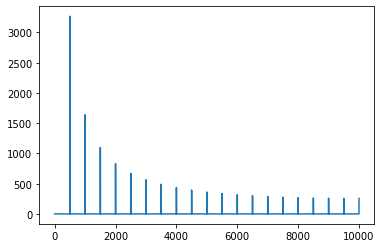

In [19]:
spectrum = wave.make_spectrum()
spectrum.plot()

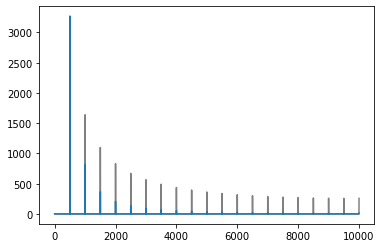

In [20]:
spectrum.plot(color='gray')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()

In [21]:
wave = spectrum.make_wave()
wave.make_audio()

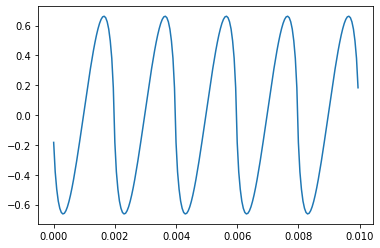

In [22]:
wave.segment(duration=0.01).plot()

In [23]:
from thinkdsp import CosSignal

freqs = np.arange(500, 9500, 500)
amps = 1 / freqs**2
signal = sum(CosSignal(freq, amp) for freq, amp in zip(freqs, amps))
signal

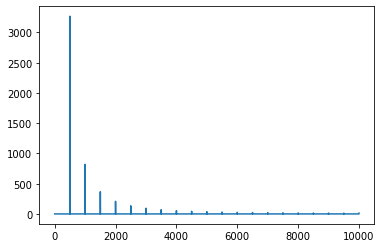

In [24]:
spectrum = wave.make_spectrum()
spectrum.plot()

In [25]:
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

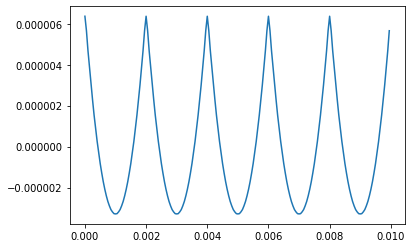

In [26]:
wave.segment(duration=0.01).plot()

In [27]:
from thinkdsp import ParabolicSignal

wave = ParabolicSignal(freq=500).make_wave(duration=0.5, framerate=20000)
wave.make_audio()

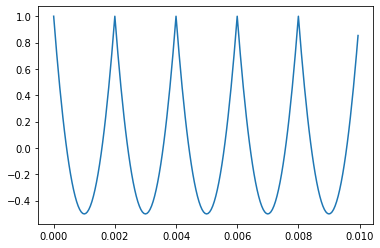

In [28]:
wave.segment(duration=0.01).plot()

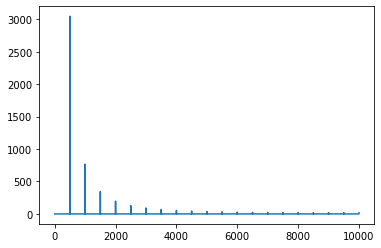

In [29]:
spectrum = wave.make_spectrum()
spectrum.plot()